In [1]:
import pandas as pd

### Experiment 1 - Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file. 

In [2]:
dataset = pd.read_csv('C:/Users/adity/OneDrive/Documents/data science/dataset/trainingdata.csv')
dataset = dataset.to_numpy()
dataset

array([['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'],
       ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
       ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'],
       ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']],
      dtype=object)

In [3]:
def find_s_algorithm(training_data):
    hypothesis = ["ϕ"] * len(training_data[0])

    
    for example in training_data:
        if example[-1] == "Yes":
            for i in range(len(example) - 1):
                if hypothesis[i] == "ϕ":
                    hypothesis[i] = example[i]
                elif hypothesis[i] != example[i]:
                    hypothesis[i] = "?"

    return hypothesis

In [4]:
final_hypothesis = find_s_algorithm(dataset)

# Print the final hypothesis
print("Final hypothesis:", final_hypothesis)

Final hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?', 'ϕ']


### Experiment 2 -  For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.

In [5]:
import numpy as np
import pandas as pd

# Read the training data from a CSV file (replace 'path/to/your/file.csv' with the actual path)
te = pd.read_csv('C:/Users/adity/OneDrive/Documents/data science/dataset/trainingexamples.csv')
te
data=te

In [6]:
# Extract the features (concepts) and the target values
concepts = np.array(data.iloc[:, :-1])
target = np.array(data.iloc[:, -1])

def learn(concepts, target):
    # Initialize specific and general hypotheses
    specific_h = concepts[0].copy()
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]

    for i, h in enumerate(concepts):
        if target[i] == 'yes':
            # Positive example: Refine the specific hypothesis
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        elif target[i] == 'no':
            # Negative example: Refine the general hypothesis
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

    # Remove any hypotheses with more specific versions in G
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])

    return specific_h, general_h

# Apply the algorithm to the given training data
s_final, g_final = learn(concepts, target)

# Print the final hypotheses
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")


Final Specific_h:
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Final General_h:
[]


### Experiment - 3 : Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

In [7]:
import numpy as np
import pandas as pd

# Read the training data from a CSV file (replace 'path/to/your/file.csv' with the actual path)
te = pd.read_csv('C:/Users/adity/OneDrive/Documents/data science/dataset/trainingexamples.csv')
te
data=te

In [8]:
data

,sky,airtemp,humidity,wind,water,forcast,enjoysport
0,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,Sunny,Warm,High,Strong,Warm,Same,Yes
2,Rainy,Cold,High,Strong,Warm,Change,No
3,Sunny,Warm,High,Strong,Cool,Change,Yes


In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/adity/OneDrive/Documents/data science/dataset/trainingdata.csv')

class TreeNode:
    def __init__(self, attribute, value):
        self.attribute = attribute
        self.value = value
        self.children = {}

    def add_child(self, value, child_node):
        self.children[value] = child_node

    def predict(self, sample):
        if not self.children:
            return self.value
        attr_value = sample[self.attribute]
        if attr_value in self.children:
            return self.children[attr_value].predict(sample)
        else:
            # If attribute value not found, return the most common value among children
            child_values = [child.value for child in self.children.values()]
            return max(set(child_values), key=child_values.count)


def entropy(data, target_attribute):
    entropy_val = 0
    target_classes = data[target_attribute].unique()
    total_samples = len(data)
    for target_class in target_classes:
        p = len(data[data[target_attribute] == target_class]) / total_samples
        entropy_val -= p * np.log2(p)
    return entropy_val


def information_gain(data, attribute, target_attribute):
    total_entropy = entropy(data, target_attribute)
    values = data[attribute].unique()
    weighted_entropy = 0
    for value in values:
        subset = data[data[attribute] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset, target_attribute)
    return total_entropy - weighted_entropy


def id3(data, attributes, target_attribute):
    # If all examples have the same classification, return a leaf node with that classification
    if len(data[target_attribute].unique()) == 1:
        return TreeNode(None, data[target_attribute].iloc[0])

    # If attributes is empty, return a leaf node with the most common classification
    if len(attributes) == 0:
        most_common_value = data[target_attribute].mode()[0]
        return TreeNode(None, most_common_value)

    # Find the attribute with the highest information gain
    max_gain = -float('inf')
    best_attribute = None
    for attribute in attributes:
        gain = information_gain(data, attribute, target_attribute)
        if gain > max_gain:
            max_gain = gain
            best_attribute = attribute

    # Create a root node with the best attribute
    root = TreeNode(best_attribute, None)

    # Remove the best attribute from the attribute list
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]

    # Create child nodes for each value of the best attribute
    for value in data[best_attribute].unique():
        subset = data[data[best_attribute] == value]
        if len(subset) == 0:
            # If subset is empty, return a leaf node with the most common classification in the original data
            most_common_value = data[target_attribute].mode()[0]
            root.add_child(value, TreeNode(None, most_common_value))
        else:
            # Recursively build the tree
            child_node = id3(subset, remaining_attributes, target_attribute)
            root.add_child(value, child_node)

    return root


def classify(sample, node):
    return node.predict(sample)




In [10]:
attributes = data.columns[:-1]
target_attribute = data.columns[-1]

root = id3(data[:-2], attributes, target_attribute)



In [11]:
new_sample = data.iloc[-1]
new_sample
    

predicted_class = classify(new_sample, root)
print(f"Predicted class for the new sample: {predicted_class}")

Predicted class for the new sample: Yes


In [12]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(iris_df['species'])

X = iris_df.drop(columns=['species', 'target'])
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Experiment - 4 : Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [15]:
import numpy as np

# Sample input data (features)
X = np.array([[2, 9], [1, 5], [3, 6]], dtype=float)

# Sample output data (target labels)
y = np.array([[0], [1], [1]], dtype=float)  # Adjust the labels as needed

# Define the neural network architecture
input_size = X.shape[1]
hidden_size = 4  # You can choose any suitable value
output_size = 1

# Initialize weights and biases randomly
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Training loop (you can adjust the number of epochs)
learning_rate = 0.01
for epoch in range(1000):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = 1 / (1 + np.exp(-output_layer_input))

    # Backpropagation
    error = y - predicted_output
    d_output = error * (predicted_output * (1 - predicted_output))
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * (hidden_layer_output * (1 - hidden_layer_output))

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate

# Test the trained model (you can use a separate test dataset)
test_input = np.array([[4, 8], [2, 7]], dtype=float)
test_hidden = 1 / (1 + np.exp(-np.dot(test_input, weights_input_hidden)))
test_output = 1 / (1 + np.exp(-np.dot(test_hidden, weights_hidden_output)))

print("Predicted outputs for test data:")
print(test_output)

Predicted outputs for test data:
[[0.6676845 ]
 [0.66562878]]


In [16]:
from random import seed,random
def initialize(inputs,hidden,outputs):
  network=list()
  hidden_layer =[{'weights':[random() for i in range(inputs+1)]} for i in range(hidden)]
  network.append(hidden_layer)
  output_layer =[{'weights':[random() for i in range(hidden+1)]} for i in range(outputs)]
  network.append(output_layer)
  return network
seed(1)
network=initialize(2,1,2)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


### Experiment - 5: Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets. 

In [17]:
# import necessary libarities
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
# load data from CSV
data = pd.read_csv('C:/Users/adity/OneDrive/Documents/data science/dataset/tennisdata.csv')
print("THe first 5 values of data is :\n",data.head())

THe first 5 values of data is :
     Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3     Rainy        Mild     High  False        Yes
4     Rainy        Cool   Normal  False        Yes


In [18]:
# obtain Train data and Train output
X = data.iloc[:,:-1]
print("\nThe First 5 values of train data is\n",X.head())


The First 5 values of train data is
     Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1     Sunny         Hot     High   True
2  Overcast         Hot     High  False
3     Rainy        Mild     High  False
4     Rainy        Cool   Normal  False


In [19]:
y = data.iloc[:,-1]
print("\nThe first 5 values of Train output is\n",y.head())


The first 5 values of Train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object


In [20]:
# Convert then in numbers 
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)

print("\nNow the Train data is :\n",X.head())


Now the Train data is :
    Outlook  Temperature  Humidity  Windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1      0


In [21]:
le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)


Now the Train output is
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
pred

array([0, 0, 1])

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))
print("Precision is:",precision_score(classifier.predict(X_test),y_test))
print("Recall is:",recall_score(classifier.predict(X_test),y_test))
print("f1_score is:",f1_score(classifier.predict(X_test),y_test))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))

Accuracy is: 0.6666666666666666
Precision is: 0.5
Recall is: 1.0
f1_score is: 0.6666666666666666
Confusion Matrix: 
 [[1 0]
 [1 1]]


### Experiment 6 :   Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform this task. Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and recall for your data set. 

In [24]:
import pandas as pd
msg = pd.read_csv('C:/Users/adity/OneDrive/Documents/data science/dataset/document.csv', names=['message', 'label'])
print("Total Instances of Dataset: ", msg.shape[0])
msg['labelnum'] = msg.label.map({'pos':1,'neg':0})

Total Instances of Dataset:  18


In [25]:
X = msg.message
y = msg.labelnum
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=101)
from sklearn.feature_extraction.text import CountVectorizer

count_v = CountVectorizer()
Xtrain_dm = count_v.fit_transform(Xtrain)
Xtest_dm = count_v.transform(Xtest)

In [26]:
df = pd.DataFrame(Xtrain_dm.toarray(),columns=count_v.get_feature_names_out())
print(df[0:5])

   am  an  and  awesome  bad  boss  can  dance  deal  do  ...  tired  to  \
0   0   0    0        0    0     0    0      0     0   0  ...      0   0   
1   0   0    0        0    0     0    0      1     0   0  ...      0   1   
2   0   0    0        0    0     0    0      0     0   1  ...      0   0   
3   0   1    0        1    0     0    0      0     0   0  ...      0   0   
4   0   1    0        1    0     0    0      0     0   0  ...      0   0   

   today  tomorrow  view  we  went  what  will  with  
0      0         1     0   1     0     0     1     0  
1      0         0     0   0     0     0     0     0  
2      0         0     0   0     0     0     0     0  
3      0         0     0   0     0     0     0     0  
4      0         0     1   0     0     1     0     0  

[5 rows x 45 columns]


In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain_dm, ytrain)
pred = clf.predict(Xtest_dm)

In [28]:
for doc, p in zip(Xtrain, pred):
    p = 'pos' if p == 1 else 'neg'
    print("%s ->%s"%(doc,p))

We will have good fun tomorrow ->neg
I love to dance ->pos
I do not like this restaurant ->pos
This is an awesome place ->pos
What an awesome view ->neg


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('Accuracy Metrics: \n')
print('Accuracy: ', accuracy_score(ytest, pred))
print('Recall: ', recall_score(ytest, pred))
print('Precision: ', precision_score(ytest, pred))
print('Confusion Matrix: \n', confusion_matrix(ytest,pred))

Accuracy Metrics: 

Accuracy:  0.6
Recall:  0.6
Precision:  1.0
Confusion Matrix: 
 [[0 0]
 [2 3]]


### Experiment 7 : Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. 

In [30]:
heart_disease = pd.read_csv('C:/Users/adity/OneDrive/Documents/data science/dataset/heartdisease.csv')
heart_disease.head()

,age,Gender,Family,diet,Lifestyle,cholestrol,heartdisease
0,0,0,1,1,3,0,1
1,0,1,1,1,3,0,1
2,1,0,0,0,2,1,1
3,4,0,1,1,3,2,0
4,3,1,1,0,0,2,0


In [40]:
from pgmpy.models import BayesianNetwork
model=BayesianNetwork ([
('age','Lifestyle'),
('Gender','Lifestyle'),
('Family','heartdisease'),
('diet','cholestrol'),
('Lifestyle','diet'),
('cholestrol','heartdisease'),
])

In [41]:
from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

from pgmpy.inference import VariableElimination
HeartDisease_infer = VariableElimination(model)

In [42]:
print('For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }')
print('For Gender Enter { Male:0, Female:1 }')
print('For Family History Enter { yes:1, No:0 }')
print('For diet Enter { High:0, Medium:1 }')
print('For lifeStyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }')
print('For cholesterol Enter { High:0, BorderLine:1, Normal:2 }')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age':int(input('Enter age :')),
    'Gender':int(input('Enter Gender :')),
    'Family':int(input('Enter Family history :')),
    'diet':int(input('Enter diet :')),
    'Lifestyle':int(input('Enter Lifestyle :')),
    'cholestrol':int(input('Enter cholestrol :'))
    })

#print(q['heartdisease'])
probabilities = q.values
# Print the probabilities
for i, prob in enumerate(probabilities):
    print(f'Probability of heart disease being {i}: {prob}')

For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }
For Gender Enter { Male:0, Female:1 }
For Family History Enter { yes:1, No:0 }
For diet Enter { High:0, Medium:1 }
For lifeStyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }
For cholesterol Enter { High:0, BorderLine:1, Normal:2 }
Probability of heart disease being 0: 0.8333333333333334
Probability of heart disease being 1: 0.16666666666666666


### Experiment 8 : Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

In [46]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
dataset=load_iris()
# print(dataset)

In [48]:
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']
print(X)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Text(0.5, 1.0, 'GMM Classification')

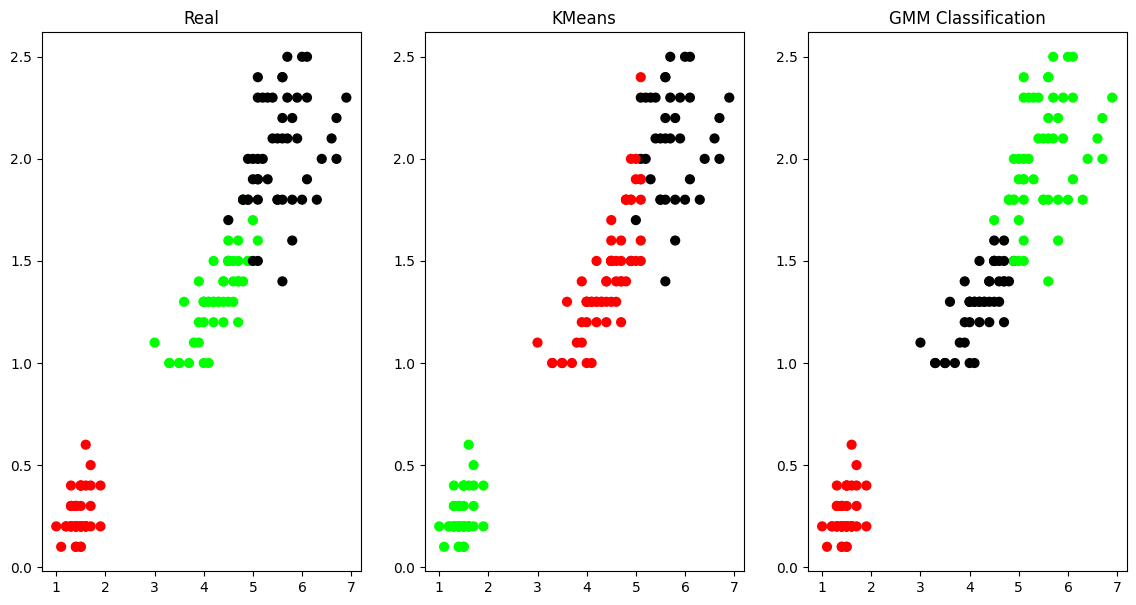

In [50]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')

# K-PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3,n_init=10)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')

# GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

### Experiment 9 : Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem. 

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce the amount of training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
predictions = knn.predict(X_test)

# Print correct and wrong predictions
correct_predictions = 0
wrong_predictions = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        print(f"Correct Prediction: Predicted Class - {predictions[i]}, Actual Class - {y_test[i]}")
        correct_predictions += 1
    else:
        print(f"Wrong Prediction: Predicted Class - {predictions[i]}, Actual Class - {y_test[i]}")
        wrong_predictions += 1

# Print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {accuracy}")
print(f"Number of Correct Predictions: {correct_predictions}")
print(f"Number of Wrong Predictions: {wrong_predictions}")

Correct Prediction: Predicted Class - 1, Actual Class - 1
Correct Prediction: Predicted Class - 0, Actual Class - 0
Correct Prediction: Predicted Class - 2, Actual Class - 2
Correct Prediction: Predicted Class - 1, Actual Class - 1
Correct Prediction: Predicted Class - 1, Actual Class - 1
Correct Prediction: Predicted Class - 0, Actual Class - 0
Correct Prediction: Predicted Class - 1, Actual Class - 1
Correct Prediction: Predicted Class - 2, Actual Class - 2
Correct Prediction: Predicted Class - 1, Actual Class - 1
Correct Prediction: Predicted Class - 1, Actual Class - 1
Correct Prediction: Predicted Class - 2, Actual Class - 2
Correct Prediction: Predicted Class - 0, Actual Class - 0
Correct Prediction: Predicted Class - 0, Actual Class - 0
Correct Prediction: Predicted Class - 0, Actual Class - 0
Correct Prediction: Predicted Class - 0, Actual Class - 0
Correct Prediction: Predicted Class - 1, Actual Class - 1
Correct Prediction: Predicted Class - 2, Actual Class - 2
Correct Predic

### Experiment 10 : Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

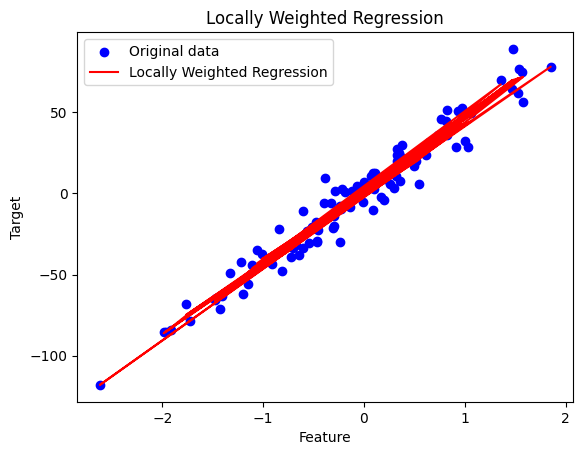

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Step 1: Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Step 2: Implement the Locally Weighted Regression algorithm
def locally_weighted_regression(test_point, X, y, tau=0.1):
    m = X.shape[0]
    weights = np.exp(-np.sum((X - test_point) ** 2, axis=1) / (2 * tau ** 2))
    W = np.diag(weights)
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    prediction = test_point @ theta
    return prediction

# Step 3: Fit the data points using Locally Weighted Regression
tau = 0.1  # Bandwidth parameter
predictions = [locally_weighted_regression(x, X, y, tau) for x in X]

# Step 4: Draw graphs to visualize the results
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, predictions, color='red', label='Locally Weighted Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()
